In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [1]:
# !pip install sklearn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [9]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
gen_sub_df = pd.read_csv('titanic/gender_submission.csv')

In [11]:
test_merged = pd.merge(test_df,gen_sub_df,on='PassengerId')

In [13]:
df = pd.concat([train_df,test_merged],ignore_index=True)

In [15]:
df.shape

(1309, 12)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

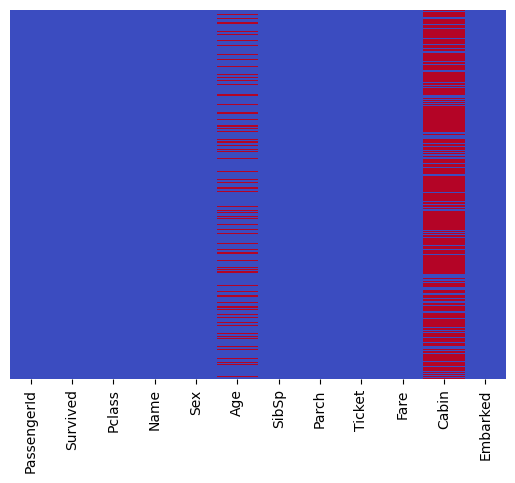

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [23]:
df.drop(columns=['Cabin'],inplace=True)

In [25]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

C:\Users\Pruthviraj\AppData\Local\Temp\ipykernel_7572\2727623519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Pruthviraj\AppData\Local\Temp\ipykernel_7572\2727623519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [27]:
df.isna().sum().sum()

0

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [31]:
df['Name']=df['Name'].apply(lambda x: x.split(',')[1])
df['Title'] = df['Name'].apply(lambda x:x.split('.')[0])

In [33]:
min_frequency = 10
title_counts = df['Title'].value_counts()
df['Title'] = df['Title'].apply(lambda x: x if title_counts[x] >= min_frequency else 'Others')

<Axes: xlabel='Title', ylabel='count'>

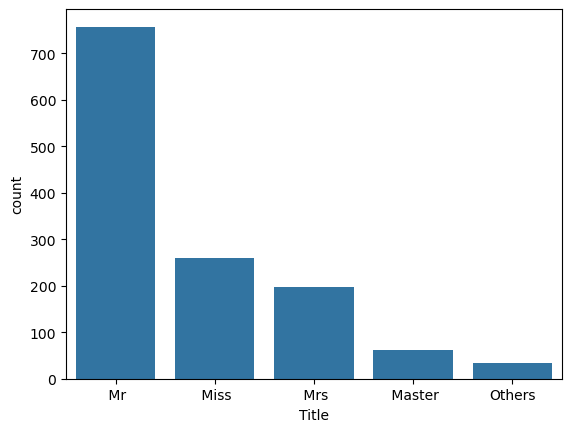

In [35]:
sns.countplot(x='Title', data=df, order=df['Title'].value_counts().index)

In [37]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex','Title'], drop_first=True)

In [39]:
df.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [41]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Embarked_Q,Embarked_S,Sex_male,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Others
0,0,3,22.0,7.2500,2,False,True,True,False,True,False,False
1,1,1,38.0,71.2833,2,False,False,False,False,False,True,False
2,1,3,26.0,7.9250,1,False,True,False,True,False,False,False
3,1,1,35.0,53.1000,2,False,True,False,False,False,True,False
4,0,3,35.0,8.0500,1,False,True,True,False,True,False,False


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

In [45]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived'],axis=1),df['Survived'],test_size=0.2,random_state=42)

In [47]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_classifier.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [55]:
# print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.816793893129771
Precision: 0.7619047619047619
Recall: 0.7766990291262136
F1-score: 0.7692307692307693


<Axes: >

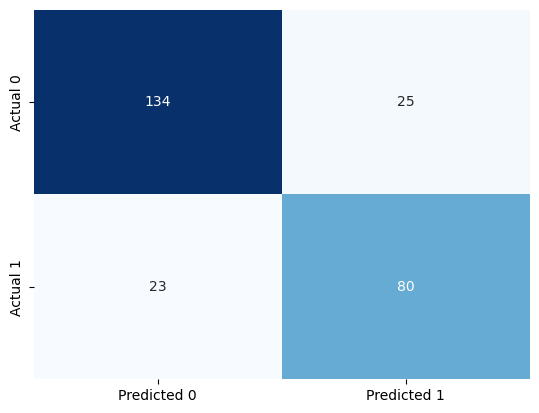

In [57]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [59]:
print("\nMean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.183206106870229
Root Mean Squared Error (RMSE): 0.428025825003853
R-squared (R2): 0.23209379007144149
